#Imports

In [6]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D
from tensorflow.keras.models import Sequential

#Fetching and Moving data

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip


local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

--2021-03-21 07:47:21--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 2607:f8b0:400e:c07::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   111MB/s    in 0.6s    

2021-03-21 07:47:22 (111 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



#Model n Stuff

In [7]:
model=Sequential([
                  Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
                  MaxPooling2D((2,2)),
                  Conv2D(64,(3,3),activation='relu'),
                  MaxPooling2D((2,2)),
                  Conv2D(128,(3,3),activation='relu'),
                  MaxPooling2D((2,2)),
                  Conv2D(128,(3,3),activation='relu'),
                  MaxPooling2D((2,2)),
                  Flatten(),
                  Dense(512,activation='relu'),
                  Dense(1,activation='sigmoid')


])

model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.0001),metrics=['accuracy',tf.keras.metrics.AUC()])

# Data Genreators with Augmentations

In [8]:
train_data_generator=ImageDataGenerator(rescale=1/255,horizontal_flip=True,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,
                                        shear_range=0.2,zoom_range=0.2,fill_mode='nearest')

test_data_generator=ImageDataGenerator(rescale=1/255)

train_generator=train_data_generator.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')

validation_generator=test_data_generator.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


#Callbacks

In [9]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>0.7):
      print("\n thats enough!!")
      self.model.stop_training=True

callbacks=myCallback()

#Training

In [13]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2,
      callbacks=[callbacks])

Epoch 1/100
100/100 - 105s - loss: 0.6304 - accuracy: 0.6400 - auc: 0.6970 - val_loss: 0.6477 - val_accuracy: 0.6210 - val_auc: 0.7539
Epoch 2/100
100/100 - 105s - loss: 0.6155 - accuracy: 0.6735 - auc: 0.7215 - val_loss: 0.5657 - val_accuracy: 0.7200 - val_auc: 0.7915
Epoch 3/100
100/100 - 105s - loss: 0.6165 - accuracy: 0.6655 - auc: 0.7192 - val_loss: 0.5801 - val_accuracy: 0.6830 - val_auc: 0.7999
Epoch 4/100
100/100 - 105s - loss: 0.5925 - accuracy: 0.6870 - auc: 0.7477 - val_loss: 0.5546 - val_accuracy: 0.7080 - val_auc: 0.7961
Epoch 5/100
100/100 - 105s - loss: 0.5876 - accuracy: 0.6925 - auc: 0.7579 - val_loss: 0.5372 - val_accuracy: 0.7260 - val_auc: 0.8050
Epoch 6/100
100/100 - 104s - loss: 0.5836 - accuracy: 0.6930 - auc: 0.7553 - val_loss: 0.5493 - val_accuracy: 0.7170 - val_auc: 0.8007
Epoch 7/100
100/100 - 104s - loss: 0.5835 - accuracy: 0.6940 - auc: 0.7547 - val_loss: 0.5364 - val_accuracy: 0.7210 - val_auc: 0.8125
Epoch 8/100
100/100 - 104s - loss: 0.5776 - accuracy: 0

#Training Visualization

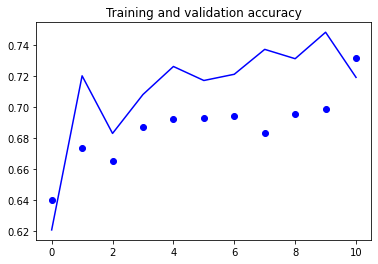

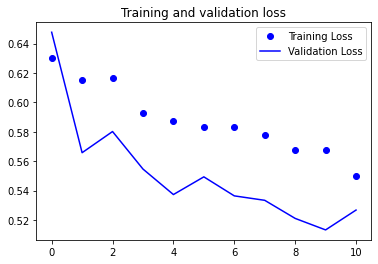

In [14]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()